In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


## Spacy

In [78]:
import spacy

In [79]:
#Initialize the Spacy Analyzer
nlp = spacy.load('en_core_web_sm')

#### Load and read books:

In [80]:
import os
import codecs

In [81]:
books = list()
corpus_root = 'books/'
for book_file in os.listdir(corpus_root):
    if ".txt" in book_file:
        print(book_file)
        with codecs.open(os.path.join(corpus_root,book_file),encoding="utf8") as f:
            books.append(f.read())

'''For single files:
corpus_root = 'data/'
with codecs.open(os.path.join(corpus_root,'all_scripts.txt'),encoding="utf8") as f:
            data = f.read()
'''
'''print: 
print(books[3][0:600])'''

DRACULA.txt
Frankenstein.txt
Moby_Dick.txt
PRIDE_AND_PREJUDICE.txt


'print: \nprint(books[3][0:600])'

#### Clean the text: (Remove newlines / )

##### Remove new lines:

In [82]:
books = [" ".join(b.split()) for b in books]

In [83]:
frank = books[1]

#put in the raw text to get a spacy object
doc = nlp(frank)

#### Split Sentences:

Spacy uses a statistical model to predict sentences. This works for general purpose text or web text. <br>
For social media use other libraries.

In [84]:
sentences = [sent for sent in doc.sents]
#print('Sentence 1:',sentences[0],'\n')

#### Tokenization (get single words, or rarely word groups):

In [85]:
example = 'I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight.'
doc_test = nlp(example)

#strings are encoded to hashes
tokens = [token.text for token in doc_test]

'''print(example,'\n')
print(tokens)'''

"print(example,'\n')\nprint(tokens)"

#### Speech tagging (taggs words):

In [86]:
pos_tagged = [(token.text, token.pos_) for token in doc_test]
#more detailed (replace pos_ by tag_):
#pos_tagged = [(token.text, token.tag_) for token in doc_test]

'''
print(example,'\n')
print(pos_tagged)
'''

"\nprint(example,'\n')\nprint(pos_tagged)\n"

Should you not understand any of the descriptions use spacy.explain:

In [87]:
print(spacy.explain('CCONJ'))
#print(spacy.explain('ADP'))
#print(spacy.explain('DET'))
#print(spacy.explain('PRP'))
#print(spacy.explain('VBP'))

coordinating conjunction


#### Named Entity Recoginition:

##### Possible entities:

PERSON  People, including fictional.  <br>
NORP	Nationalities or religious or political groups. <br>
FAC	Buildings, airports, highways, bridges, etc. <br>
ORG	Companies, agencies, institutions, etc. <br>
GPE	Countries, cities, states. <br>
LOC	Non-GPE locations, mountain ranges, bodies of water. <br>
PRODUCT	Objects, vehicles, foods, etc. (Not services.) <br>
EVENT	Named hurricanes, battles, wars, sports events, etc. <br>
WORK_OF_ART	Titles of books, songs, etc. <br>
LAW	Named documents made into laws. <br>
LANGUAGE	Any named language. <br>
DATE	Absolute or relative dates or periods. <br>
TIME	Times smaller than a day. <br>
PERCENT	Percentage, including "%". <br>
MONEY	Monetary values, including unit. <br>
QUANTITY	Measurements, as of weight or distance. <br>
ORDINAL	"first", "second", etc. <br>
CARDINAL	Numerals that do not fall under another type. <br>

##### Code:

In [88]:
print(example,'\n')
for ent in doc_test.ents:
    print(ent.text, ent.label_)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

London GPE
Petersburgh PERSON


#### Removing Stop words:

In [89]:
#get the stopwords there are:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
'''print
print('Number of stop words: %d' % len(spacy_stopwords))
print('First ten stop words:',list(spacy_stopwords)[:10])
'''

"print\nprint('Number of stop words: %d' % len(spacy_stopwords))\nprint('First ten stop words:',list(spacy_stopwords)[:10])\n"

In [90]:
#get the stopwords of an example:

#print(example,'\n')
'''Replace doc_test'''
stop_words = [token.text for token in doc_test if token.is_stop]
#print(stop_words)

#### Lemmatization (token --> lemma):

In [91]:
# print(example,'\n')
for token in doc_test:
    if token.text != token.lemma_:
        print(token.text,'--->',token.lemma_)

am ---> be
streets ---> street
cheeks ---> cheek
braces ---> brace
nerves ---> nerve
fills ---> fill
me ---> I


#### Chunking (noun-chunks): 

Are chunks of words that belong to one noun: (the lavish green grass), (the world's largest tech fund), etc.

In [92]:
#print(example,'\n')

for chunk in doc_test.noun_chunks:
    print(chunk.text)

I
London
I
the streets
Petersburgh
I
a cold northern breeze
my cheeks
which
my nerves
me
delight


#### Dependancy parsing (Token; Head; Children):

In [93]:
#print(example,'\n')

for token in doc_test:
    #print('Token:',token.text,'Head:',token.head.text, 'Children:',[child for child in token.children])
    a =1

#### Counting Word occurences:

##### Normal:

In [94]:
from collections import Counter

print(example,'\n')
words = [token.text for token in doc_test]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

[('I', 3), (',', 3), ('of', 2), ('and', 2), ('my', 2), ('am', 1), ('already', 1), ('far', 1), ('north', 1), ('London', 1), ('as', 1), ('walk', 1), ('in', 1), ('the', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('a', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('upon', 1), ('cheeks', 1), ('which', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('me', 1), ('with', 1), ('delight', 1), ('.', 1)]


##### Without stop words and punctuation:

In [95]:
words = [token.text for token in doc_test if token.is_stop != True and token.is_punct != True]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words)

[('far', 1), ('north', 1), ('London', 1), ('walk', 1), ('streets', 1), ('Petersburgh', 1), ('feel', 1), ('cold', 1), ('northern', 1), ('breeze', 1), ('play', 1), ('cheeks', 1), ('braces', 1), ('nerves', 1), ('fills', 1), ('delight', 1)]


#### Remove pipelines if you don't need them: (tagger, parser)

Parsing: Getting the relationship between words and their meaning / structures of sentences
Tagging: get "tags"/descriptions for words.

In [96]:
nlp.remove_pipe('parser')
nlp.remove_pipe('tagger')

('tagger', <spacy.pipeline.tagger.Tagger at 0x1dc85782a60>)

### Sentiment Analysis: 

Returns four values: Negative, Neutral and Positive sum up to 1. <br>
The compound variable is calculated by <br>
$$compound = {{(pos - neg)} \over{(pos + neg + neu)}}$$
This gives values between -1 (very negative) and 1 (very positive)

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(example)

'''
print(example, '\n')
print('Negative sentiment:',vs['neg'])
print('Neutral sentiment:',vs['neu'])
print('Positive sentiment:',vs['pos'])
print('Compound sentiment:',vs['compound'])
'''

"\nprint(example, '\n')\nprint('Negative sentiment:',vs['neg'])\nprint('Neutral sentiment:',vs['neu'])\nprint('Positive sentiment:',vs['pos'])\nprint('Compound sentiment:',vs['compound'])\n"

#### Book example:

In [98]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

In [99]:
positive_sent = []
negative_sent = []
total_sent = []
#iterate through the sentences, get polarity scores, choose a value
'''replace doc'''
[positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for sent in doc.sents]
[negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for sent in doc.sents]
[total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for sent in doc.sents]

'''plot histogram
plt.hist(positive_sent,bins=15)
plt.xlim([0,1])
plt.ylim([0,8000])
plt.xlabel('Positive sentiment')
plt.ylabel('Number of sentences')'''

"plot histogram\nplt.hist(positive_sent,bins=15)\nplt.xlim([0,1])\nplt.ylim([0,8000])\nplt.xlabel('Positive sentiment')\nplt.ylabel('Number of sentences')"

##### Get counts:

In [100]:
sents = [analyzer.polarity_scores(sent.text)['compound'] for sent in doc.sents]

'''Print counts (look at them anyways)
print('Number of positive sentences:',sum(np.array(sents)>=0.05))
print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))'''

"Print counts (look at them anyways)\nprint('Number of positive sentences:',sum(np.array(sents)>=0.05))\nprint('Number of negative sentences:',sum(np.array(sents)<=-0.05))\nprint('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))"

## Document classification (NLTK):


In [101]:
from nltk.corpus import PlaintextCorpusReader
?PlaintextCorpusReader
our_books = PlaintextCorpusReader(corpus_root, '.*.txt')
print(our_books.fileids())

['DRACULA.txt', 'Frankenstein.txt', 'Moby_Dick.txt', 'PRIDE_AND_PREJUDICE.txt']


Init signature:
PlaintextCorpusReader(
    root,
    fileids,
    word_tokenizer=WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL),
    sent_tokenizer=<nltk.tokenize.punkt.PunktSentenceTokenizer object at 0x000001DC81F8E4F0>,
    para_block_reader=<function read_blankline_block at 0x000001DC81FA3310>,
    encoding='utf8',
)
Docstring:     
Reader for corpora that consist of plaintext documents.  Paragraphs
are assumed to be split using blank lines.  Sentences and words can
be tokenized using the default tokenizers, or by custom tokenizers
specified as parameters to the constructor.

This corpus reader can be customized (e.g., to skip preface
sections of specific document formats) by creating a subclass and
overriding the ``CorpusView`` class variable.
Init docstring:
Construct a new plaintext corpus reader for a set of documents
located at the given root directory.  Example usage:

    >>> root = '/usr/local/share/nlt

### Segmentation into chunks

In [102]:
#n = how many sentences per chunk, l = sentences (all sentences)
def get_chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]


# Get the data /   fileids() returns book titles
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books

chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 500 # how many chunks total
size = 50 # how many sentences per chunk/page

# fileids() returns book titles
for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f,":")
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt :
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt :
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt :
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt :
Number of sentences: 6055
Number of chunks: 122 



### Transform chunks to bag-of-words:

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()

#initialize and specify minumum number of occurences to avoid untractable number of features
#vectorizer = CountVectorizer(min_df = 2) if we want high frequency

#create bag of words features
X = vectorizer.fit_transform(chunks)

print('Number of samples:',X.toarray().shape[0])
print('Number of features:',X.toarray().shape[1])

#mask and convert to int Frankenstein
Y = np.array(chunk_class) == 1
Y = Y.astype(int)  

#shuffle the data
X, Y = shuffle(X, Y, random_state=0)

#split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#0.3 -> 70 % training portion
#Y_test = Y_test.reset_index(drop=True)

Number of samples: 570
Number of features: 23116


### fit regularized logistic regression. crossvalidation on regularization parameters on the training set.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Accuracy
accs = []

#the grid of regularization parameter 
grid = [0.01,0.1,1,10,100,1000,10000]

for c in grid:
    
    #initialize the classifier
    #C = regularization parameter
    clf = LogisticRegression(random_state=0, solver='lbfgs',C = c)
    
    #crossvalidate (try the different groups and for every group get an error)
    scores = cross_val_score(clf, X_train,Y_train, cv=10)
    #Take the mean of the obtained errors.
    accs.append(np.mean(scores))

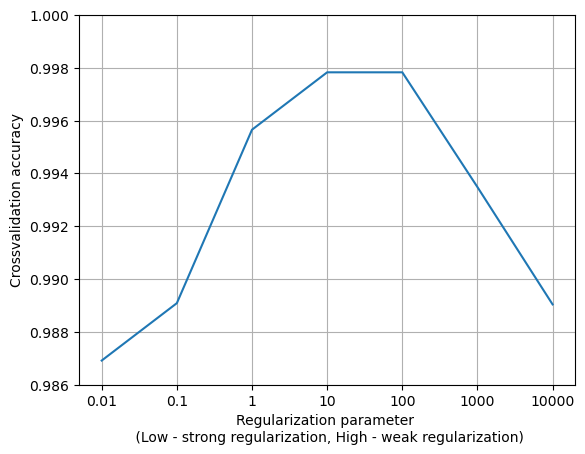

In [105]:
plt.plot(accs)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Regularization parameter \n (Low - strong regularization, High - weak regularization)')
plt.ylabel('Crossvalidation accuracy')
plt.ylim([0.986,1])
plt.grid()

### text-relevant features:

In [106]:

clf = LogisticRegression(random_state=0, solver='lbfgs',C = 10).fit(X_train,Y_train)

coefs=clf.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]

print(np.array(vectorizer.get_feature_names_out())[top_three])

['frankenstein' 'yet' 'had' 'father' 'me' 'creature' 'by' 'poor' 'towards'
 'this' 'death' 'misery' 'which' 'my' 'who' 'and' 'of' 'justine' 'but'
 'will']


### Word-embedding (get them close in space):

You map words into a numerical space and try to get similar words into proximity. <br>
Capture meaning of a word in a numerical representation.

In [107]:
print(example,'\n')
print('Embedding representation:',list((nlp(example).vector)[0:10]),'...')

I am already far north of London, and as I walk in the streets of Petersburgh, I feel a cold northern breeze play upon my cheeks, which braces my nerves and fills me with delight. 

Embedding representation: [0.04903761, 0.13703471, 0.30768856, -0.20483726, -0.16568802, -0.06900881, -0.13494389, -0.13023743, 0.15460855, -0.10217006] ...


## Topic detection:

### get the chunks (smaller than the ones above):

In [108]:
# Get the chunks again (into smaller chunks)
book_id = {f:n for n,f in enumerate(our_books.fileids())} # dictionary of books
chunks = list()
chunk_class = list() # this list contains the original book of the chunk, for evaluation

limit = 60 # how many chunks total
size = 50 # how many sentences per chunk/page

for f in our_books.fileids():
    sentences = our_books.sents(f)
    print(f)
    print('Number of sentences:',len(sentences))
    
    # create chunks
    chunks_of_sents = [x for x in get_chunks(sentences,size)] # this is a list of lists of sentences, which are a list of tokens
    chs = list()
    
    # regroup so to have a list of chunks which are strings
    for c in chunks_of_sents:
        grouped_chunk = list()
        for s in c:
            grouped_chunk.extend(s)
        chs.append(" ".join(grouped_chunk))
    print("Number of chunks:",len(chs),'\n')
    
    # filter to the limit, to have the same number of chunks per book
    chunks.extend(chs[:limit])
    chunk_class.extend([book_id[f] for _ in range(len(chs[:limit]))])

DRACULA.txt
Number of sentences: 9303
Number of chunks: 187 

Frankenstein.txt
Number of sentences: 3378
Number of chunks: 68 

Moby_Dick.txt
Number of sentences: 9609
Number of chunks: 193 

PRIDE_AND_PREJUDICE.txt
Number of sentences: 6055
Number of chunks: 122 



### Remove stopwords, remove common words, and add entities that contain more than 1 word, add bigrams:

In [109]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

processed_docs = list()
#nlp.pipe() is an iterator.
for doc in nlp.pipe(chunks, n_process=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than word.
    doc.extend([str(entity) for entity in ents if len(entity) > 1])

    processed_docs.append(doc)
docs = processed_docs
del processed_docs

In [110]:
# Add bigrams (word pairs) too
from gensim.models.phrases import Phrases

# Add bigrams to docs (only ones that appear 15 times or more).
bigram = Phrases(docs, min_count=15)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

### Filter out rare and common words:

In [111]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)

# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 5
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of chunks: %d' % len(corpus))

Number of unique tokens: 3081
Number of chunks: 240


### Use LDA (gensim) to detect topics:

LDA is a model that helps to detect topics from several documents. <br>
We define the number of topics we want the model to discover. <br>
The model assigns topics to each word in each document with a certain probability. <br>
The model calculates probability distributions for words in the different topics. <br>
Model computes probability distribution over topics for each document. <br>

It is unsupervised learning.<br>
Read the written summary.

#### Load model:

In [112]:
from gensim.models import LdaMulticore
seed = 42
params = {'passes': 10, 'random_state': seed}
base_models = dict()
model = LdaMulticore(corpus=corpus, num_topics=4, id2word=dictionary, workers=6,
                passes=params['passes'], random_state=params['random_state'])

#### Show the most important words of each topic:

In [113]:
# show the five most important word of every topic
model.show_topics(num_words=5)
# show the 20 most important words of topic 1.
model.show_topic(1,20)

[('Elizabeth', 0.006587074),
 ('father', 0.0061777737),
 ('life', 0.004432523),
 ('feeling', 0.0044309115),
 ('Collins', 0.004022779),
 ('return', 0.0038955268),
 ('pass', 0.003797016),
 ('appear', 0.0037456974),
 ('love', 0.0033568845),
 ('mind', 0.0033486697),
 ('hope', 0.003173389),
 ('dear', 0.0030781385),
 ('remain', 0.002935157),
 ('enter', 0.002924641),
 ('heart', 0.0028581042),
 ('wish', 0.0027437934),
 ('death', 0.0027272368),
 ('young', 0.0026764576),
 ('family', 0.002666689),
 ('word', 0.0026335758)]

#### plot the topics:

sort the model (I did not really get how that exactly works):

In [114]:
sorted(model[corpus[0]],key=lambda x:x[1],reverse=True)

[(0, 0.9972452)]

In [115]:
%% skip
#pyLDAvis is not installed on adaexam
# plot topics
import pyLDAvis
import pyLDAvis.gensim_models as gensim_vis

data =  gensim_vis.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

UsageError: Cell magic `%%` not found.


#### Plot accuracy:

In [116]:
# assignment
sent_to_cluster = list()
for n,doc in enumerate(corpus):
    if doc:
        cluster = max(model[doc],key=lambda x:x[1])
        sent_to_cluster.append(cluster[0])

In [117]:
# accuracy
from collections import Counter
for book, cluster in book_id.items():
    assignments = list()
    for real,given in zip(chunk_class,sent_to_cluster):
        if real == cluster:
            assignments.append(given)
    most_common,num_most_common = Counter(assignments).most_common(1)[0] # 4, 6 times
    print(book,":",most_common,"-",num_most_common)
    print("Accuracy:",num_most_common/limit)
    print("------")

DRACULA.txt : 0 - 52
Accuracy: 0.8666666666666667
------
Frankenstein.txt : 1 - 59
Accuracy: 0.9833333333333333
------
Moby_Dick.txt : 3 - 50
Accuracy: 0.8333333333333334
------
PRIDE_AND_PREJUDICE.txt : 2 - 58
Accuracy: 0.9666666666666667
------


## Semantic Analysis based on lexical categories.

Semantic analysis is the process of understanding the meaning of words and phrases in a given context. It involves analyzing language to determine its intended meaning, taking into account factors such as the structure of the sentence, the context in which it is used, and the relationships between the words and phrases. This process is important for natural language processing tasks such as language translation, text summarization, and text classification, as it helps to extract the intended meaning of the language and understand how it is being used.

### Load empath Lexikon

In [118]:
from empath import Empath
lexicon = Empath()

print the first 8 words from the category "cat". <br>
You can also choose words related to "cat" that are also related to "health".

In [119]:
for cat in list(lexicon.cats.keys())[:8]:
    print(cat)

lexicon.cats["health"][:8]

help
office
dance
money
wedding
domestic_work
sleep
medical_emergency


['tumor',
 'pharmacy',
 'symptom',
 'concussion',
 'epilepsy',
 'nurse',
 'pancreatic',
 'disability']

### Analyse text:

In [120]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(books[3])

#### Check for topics given by you:

In [121]:
empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"])

#normalize
#empath_features = lexicon.analyze(doc.text,categories = ["disappointment", "pain", "joy", "beauty", "affection"], normalize = True)

empath_features #number of words in doc that correspond to the given categories. (or normalized fraction)

{'disappointment': 149.0,
 'pain': 228.0,
 'joy': 278.0,
 'beauty': 136.0,
 'affection': 439.0}

#### Check how topics evolve:

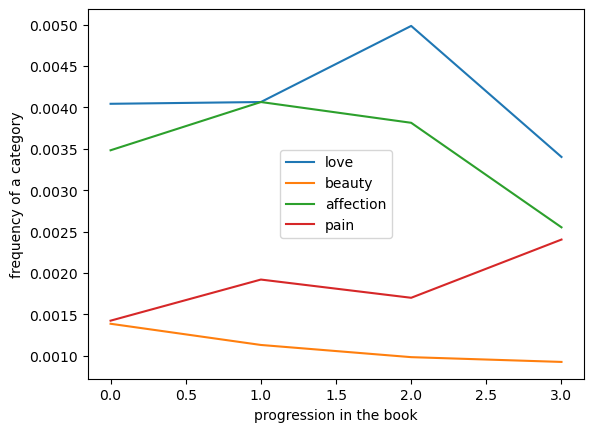

In [122]:
bins = range(0,len(doc.text),150000)

love = []
pain = []
beauty = []
affection = []


for cnt,i in enumerate(bins[:-1]):
    empath_features = lexicon.analyze(doc.text[bins[cnt]:bins[cnt+1]],
                                      categories = ["love", "pain", "joy", "beauty", "affection"], normalize = True)
    love.append(empath_features["love"])
    pain.append(empath_features["pain"])
    beauty.append(empath_features["beauty"])
    affection.append(empath_features["affection"])

plt.plot(love,label = "love")
plt.plot(beauty, label = "beauty")
plt.plot(affection, label = "affection")
plt.plot(pain,label = "pain")

plt.xlabel("progression in the book")
plt.ylabel("frequency of a category")
plt.legend()

#### Create categories:

In [123]:
lexicon.create_category("healthy_food", ["healthy_food","low_carb","kale","avocado"], model="nytimes")

'''other models:
fiction or reddit'''

["avocado", "kale", "Swiss_chard", "escarole", "black_beans", "cucumber", "dill", "leek", "mango", "red_peppers", "chicory", "chanterelles", "chutney", "tamarind", "papaya", "black_olives", "endive", "pesto", "walnuts", "green_beans", "bok_choy", "portobello_mushrooms", "lemon_grass", "radicchio", "ricotta", "chicken_breast", "porcini", "blue_cheese", "snow_peas", "pickled", "Gorgonzola", "chorizo", "yams", "hazelnuts", "fresh_tomatoes", "shiitake_mushrooms", "anchovies", "wild_rice", "scallion", "red_onions", "broccoli_rape", "red_cabbage", "wasabi", "sweet_potato", "feta", "roasted_garlic", "compote", "napoleon", "aioli", "crab_meat", "cauliflower", "jicama", "parsnips", "apricots", "new_potatoes", "truffle_oil", "lemongrass", "pistachios", "saut\u00e9ed", "gnocchi", "duck_confit", "fresh_herbs", "ratatouille", "white_beans", "croutons", "fresh_mozzarella", "squab", "watercress", "roasted_red_peppers", "pine_nuts", "fritters", "butternut_squash", "fava_beans", "drizzled", "red_onion"

'other models:\nfiction or reddit'

## TF-IDF:

In [124]:
%%skip
from sklearn.feature_extraction.text import TfidfVectorizer
# Define the text documents
text_docs = df['text_column'].to_numpy()

# Create the TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit and transform the text documents
tfidf_matrix = tfidf.fit_transform(text_docs)

# Print the resulting TF-IDF matrix
print(tfidf_matrix.toarray())

UsageError: Cell magic `%%skip` not found.
